In [1]:
# Lets get some import statements for the needed libraries.
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
nyc_housing = pd.read_csv("data/nyc-rolling-sales.csv")
nyc_housing.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


# Data Clean Up

In [3]:
nyc_housing.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,84548.0,10344.359878,7151.779436,4.0,4231.00,8942.0,15987.25,26739.0
BOROUGH,84548.0,2.998758,1.289790,1.0,2.00,3.0,4.00,5.0
BLOCK,84548.0,4237.218976,3568.263407,1.0,1322.75,3311.0,6281.00,16322.0
LOT,84548.0,376.224015,658.136814,1.0,22.00,50.0,1001.00,9106.0
ZIP CODE,84548.0,10731.991614,1290.879147,0.0,10305.00,11209.0,11357.00,11694.0
RESIDENTIAL UNITS,84548.0,2.025264,16.721037,0.0,0.00,1.0,2.00,1844.0
COMMERCIAL UNITS,84548.0,0.193559,8.713183,0.0,0.00,0.0,0.00,2261.0
TOTAL UNITS,84548.0,2.249184,18.972584,0.0,1.00,1.0,2.00,2261.0
YEAR BUILT,84548.0,1789.322976,537.344993,0.0,1920.00,1940.0,1965.00,2017.0
TAX CLASS AT TIME OF SALE,84548.0,1.657485,0.819341,1.0,1.00,2.0,2.00,4.0


In [4]:
#Drop Unnamed column; adds no substance to the data
nyc_housing.drop(columns = ['Unnamed: 0'], inplace = True)
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   EASE-MENT                       84548 non-null  object
 7   BUILDING CLASS AT PRESENT       84548 non-null  object
 8   ADDRESS                         84548 non-null  object
 9   APARTMENT NUMBER                84548 non-null  object
 10  ZIP CODE                        84548 non-null  int64 
 11  RESIDENTIAL UNITS               84548 non-null  int64 
 12  COMMERCIAL UNITS                84548 non-null

In [5]:
# Convert the column values into possible NaN's
test = ['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']
for col in test:
  nyc_housing[col] = pd.to_numeric(nyc_housing[col], errors='coerce')

In [6]:
# More changes to category
changes = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'EASE-MENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'BUILDING CLASS AT TIME OF SALE']

for col in  changes:
  nyc_housing[col] = nyc_housing[col].astype('category')
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         84548 non-null  int64   
 1   NEIGHBORHOOD                    84548 non-null  category
 2   BUILDING CLASS CATEGORY         84548 non-null  category
 3   TAX CLASS AT PRESENT            84548 non-null  category
 4   BLOCK                           84548 non-null  int64   
 5   LOT                             84548 non-null  int64   
 6   EASE-MENT                       84548 non-null  category
 7   BUILDING CLASS AT PRESENT       84548 non-null  category
 8   ADDRESS                         84548 non-null  category
 9   APARTMENT NUMBER                84548 non-null  category
 10  ZIP CODE                        84548 non-null  int64   
 11  RESIDENTIAL UNITS               84548 non-null  int64   
 12  COMMERCIAL UNITS  

In [7]:
# Changing even more columns to category datatype
more_changes = ['BOROUGH', 'BLOCK', 'LOT', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE']

for col in more_changes:
  nyc_housing[col] = nyc_housing[col].astype('category')

In [8]:
# Converts sale date from object to sale datetime type
nyc_housing['SALE DATE'] = pd.to_datetime(nyc_housing['SALE DATE'])

In [9]:
# Everything should be presented as a good data type
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  category      
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  category      
 5   LOT                             84548 non-null  category      
 6   EASE-MENT                       84548 non-null  category      
 7   BUILDING CLASS AT PRESENT       84548 non-null  category      
 8   ADDRESS                         84548 non-null  category      
 9   APARTMENT NUMBER                84548 non-null  category      
 10  ZIP CODE                        84548 non-null  category      
 11  RE

In [10]:
# Removing nulls
nyc_housing = nyc_housing.dropna()

In [11]:
# Removing outliers
# Removing rows where buildings were built in year 0
nyc_housing = nyc_housing[nyc_housing['YEAR BUILT']!=0]

In [12]:
nyc_housing

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,2,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,2,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,2,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,0,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21


In [13]:
# Checking for outliers / 8345 rows of 0's
nyc_housing[nyc_housing['LAND SQUARE FEET']==0]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
18354,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH STREET, 6E",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17
18355,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3035,48,,D4,"463 EAST 178TH ST, 6B",,...,0,0,0,0.0,0.0,1935,2,D4,40000.0,2017-04-17
18356,2,BATHGATE,10 COOPS - ELEVATOR APARTMENTS,2,3044,40,,D4,"495 E 178TH STREET, 2H",,...,0,0,0,0.0,0.0,1941,2,D4,60000.0,2016-12-01
18746,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1009,,R3,2877 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,310000.0,2017-02-28
18747,2,BAYCHESTER,04 TAX CLASS 1 CONDOS,1A,4795,1027,,R3,2853 ELY AVENUE,3,...,1,0,1,0.0,0.0,2008,1,R3,342500.0,2017-07-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49292,3,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-25
49293,3,WINDSOR TERRACE,44 CONDO PARKING,4,5287,1035,,RP,207 PROSPECT PARK SW,P35,...,0,0,1,0.0,0.0,1990,4,RP,0.0,2017-07-17
49294,3,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1213,,RS,11 TERRACE PLACE,S2,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-06
49295,3,WINDSOR TERRACE,47 CONDO NON-BUSINESS STORAGE,4,895,1219,,RS,11 TERRACE PLACE,S8,...,0,0,1,0.0,0.0,2006,4,RS,0.0,2016-10-24


In [14]:
# Removing the outliers
nyc_housing = nyc_housing[nyc_housing['LAND SQUARE FEET']!=0]
nyc_housing = nyc_housing[nyc_housing['GROSS SQUARE FEET']!=0]

<Axes: xlabel='YEAR BUILT', ylabel='SALE PRICE'>

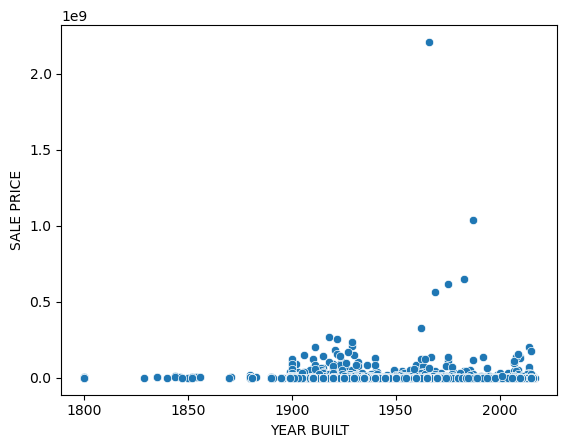

In [15]:
# Scatterplot of the Dataset using YEAR BUILT & SALE PRICE
sns.scatterplot(data=nyc_housing, x='YEAR BUILT', y='SALE PRICE')

In [16]:
# Age of the Property (as of 2021)
nyc_housing['AGE'] = 2021 - nyc_housing['YEAR BUILT']
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36805 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         36805 non-null  category      
 1   NEIGHBORHOOD                    36805 non-null  category      
 2   BUILDING CLASS CATEGORY         36805 non-null  category      
 3   TAX CLASS AT PRESENT            36805 non-null  category      
 4   BLOCK                           36805 non-null  category      
 5   LOT                             36805 non-null  category      
 6   EASE-MENT                       36805 non-null  category      
 7   BUILDING CLASS AT PRESENT       36805 non-null  category      
 8   ADDRESS                         36805 non-null  category      
 9   APARTMENT NUMBER                36805 non-null  category      
 10  ZIP CODE                        36805 non-null  category      
 11  RESIDEN

In [17]:
nyc_housing['AGE CATEGORY'] = np.where(nyc_housing['AGE'] >= 76, 'Pre War', 'Post War')

<Axes: xlabel='AGE', ylabel='SALE PRICE'>

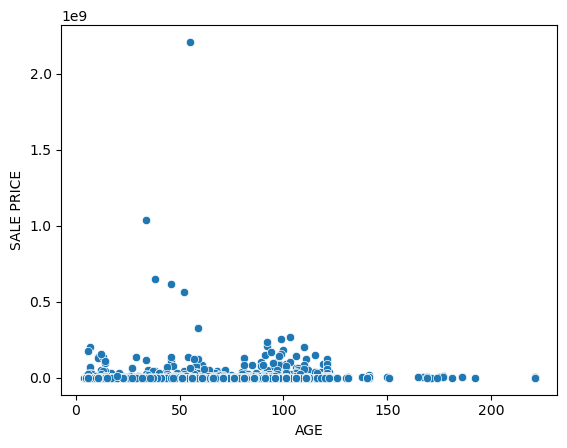

In [18]:
sns.scatterplot(data=nyc_housing, x='AGE', y='SALE PRICE')

In [19]:
nyc_housing = nyc_housing[nyc_housing['AGE'] < 150]

In [20]:
nyc_housing['SALE PRICE'].describe().transpose()

count    3.677800e+04
mean     1.304172e+06
std      1.519091e+07
min      0.000000e+00
25%      1.590648e+05
50%      5.030000e+05
75%      8.400000e+05
max      2.210000e+09
Name: SALE PRICE, dtype: float64

Homes greater-than 300,000,000 are no longer "homes"

In [21]:
nyc_housing = nyc_housing[nyc_housing['SALE PRICE'] < 300000000]

<Axes: xlabel='AGE', ylabel='SALE PRICE'>

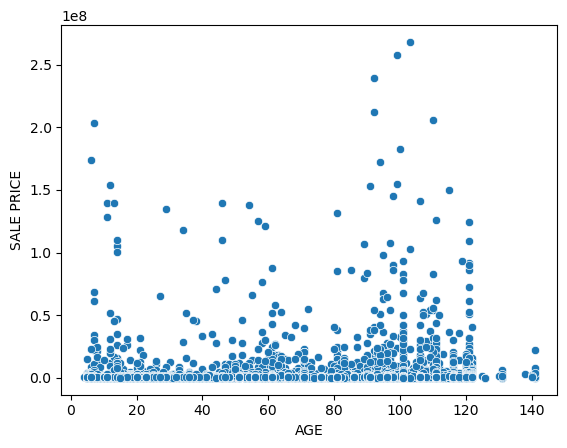

In [22]:
sns.scatterplot(data=nyc_housing, x='AGE', y='SALE PRICE')

In [23]:
nyc_housing['SALE PRICE'].describe().transpose()

count    3.677200e+04
mean     1.157071e+06
std      5.938572e+06
min      0.000000e+00
25%      1.584455e+05
50%      5.027500e+05
75%      8.400000e+05
max      2.681242e+08
Name: SALE PRICE, dtype: float64

max = $268,124,200 

25% = $158,445.50

median = $502,750

75% = $840,000
<!-- 
label - 1 = 0 2,600,000
label - 2 = 2,600,000 - 5,200,000
...

label 99
label 100 =  -->

cheapest = (0 -> 25%)
cheap = (25% -> Median)
expensive = (Median -> 75%)
most expensive = (75% -> 100%)

In [24]:
nyc_housing = nyc_housing[nyc_housing['SALE PRICE'] > 50000]

In [25]:
nyc_housing.describe()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,AGE
count,28097.000000,28097.000000,28097.000000,2.809700e+04,2.809700e+04,28097.000000,2.809700e+04,28097,28097.000000
mean,3.001388,0.330427,3.330356,4.255868e+03,4.208513e+03,1940.760117,1.514015e+06,2017-02-25 22:28:12.565042432,80.239883
min,0.000000,0.000000,0.000000,2.000000e+02,1.200000e+02,1880.000000,5.100000e+04,2016-09-01 00:00:00,4.000000
25%,1.000000,0.000000,1.000000,2.000000e+03,1.360000e+03,1920.000000,4.408880e+05,2016-11-29 00:00:00,61.000000
50%,2.000000,0.000000,2.000000,2.500000e+03,1.869000e+03,1930.000000,6.400000e+05,2017-02-27 00:00:00,91.000000
75%,2.000000,0.000000,2.000000,4.000000e+03,2.652000e+03,1960.000000,9.750000e+05,2017-05-26 00:00:00,101.000000
max,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.681242e+08,2017-08-31 00:00:00,141.000000
std,19.493829,14.315169,24.315513,3.836032e+04,2.987793e+04,30.316429,6.753930e+06,NaN,30.316429


In [26]:
df_cat = nyc_housing.select_dtypes(include='object')
df_num = nyc_housing.select_dtypes(exclude='object')

In [27]:
df_num

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19,121
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,108
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17,121
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,,C4,210 AVENUE B,,...,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,101
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,,D9,629 EAST 5TH STREET,,...,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07,101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,,...,0,2,2400.0,2575.0,1998,1,B9,450000.0,2016-11-28,23
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,,...,0,2,2498.0,2377.0,1998,1,B9,550000.0,2017-04-21,23
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,,...,0,2,4000.0,1496.0,1925,1,B2,460000.0,2017-07-05,96
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,,...,7,7,208033.0,64117.0,2001,4,K6,11693337.0,2016-12-21,20


In [28]:
plt.figure(figsize=[10,10])
sns.heatmap(df_num.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: ' '

<Figure size 1000x1000 with 0 Axes>

Gross Square Feet:
The total area of all the floors of a building as measured from the exterior surfaces of the
outside walls of the building, including the land area and space within any building or structure
on the property

---------

STRONG CORRELATIONS
*   Residential to Total units (.95)
*   Gross Sq to Total units (.75)
*   Residential to Gross Sq (.72)

--------

Binning (For Categorizing)


*   Equal Width (Max - Min) / no. bins
*   Equal Depth/Frequency

--------

32 bins with 878 items in each bin

In [ ]:
df_num.corr().describe().transpose()

ValueError: could not convert string to float: ' '

In [ ]:
nyc_housing.drop(["EASE-MENT"], axis=1, inplace=True)
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28097 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         28097 non-null  category      
 1   NEIGHBORHOOD                    28097 non-null  category      
 2   BUILDING CLASS CATEGORY         28097 non-null  category      
 3   TAX CLASS AT PRESENT            28097 non-null  category      
 4   BLOCK                           28097 non-null  category      
 5   LOT                             28097 non-null  category      
 6   BUILDING CLASS AT PRESENT       28097 non-null  category      
 7   ADDRESS                         28097 non-null  category      
 8   APARTMENT NUMBER                28097 non-null  category      
 9   ZIP CODE                        28097 non-null  category      
 10  RESIDENTIAL UNITS               28097 non-null  int64         
 11  CO

In [29]:
nyc_housing['SALE PRICE'].min()

51000.0

In [ ]:
nyc_housing['SALE PRICE'].max()

268124175.0

In [ ]:
bins=np.linspace(51000.0,268124175.0, 32)

In [ ]:
bins

array([5.10000000e+04, 8.69852177e+06, 1.73460435e+07, 2.59935653e+07,
       3.46410871e+07, 4.32886089e+07, 5.19361306e+07, 6.05836524e+07,
       6.92311742e+07, 7.78786960e+07, 8.65262177e+07, 9.51737395e+07,
       1.03821261e+08, 1.12468783e+08, 1.21116305e+08, 1.29763827e+08,
       1.38411348e+08, 1.47058870e+08, 1.55706392e+08, 1.64353914e+08,
       1.73001435e+08, 1.81648957e+08, 1.90296479e+08, 1.98944001e+08,
       2.07591523e+08, 2.16239044e+08, 2.24886566e+08, 2.33534088e+08,
       2.42181610e+08, 2.50829131e+08, 2.59476653e+08, 2.68124175e+08])

In [ ]:
nyc_housing = nyc_housing.sort_values(by=['SALE PRICE'])
nyc_housing.head()
nyc_housing['SALE PRICE'] = pd.qcut(nyc_housing['SALE PRICE'], q=32, duplicates='drop')

In [ ]:
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28097 entries, 31184 to 9594
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         28097 non-null  category      
 1   NEIGHBORHOOD                    28097 non-null  category      
 2   BUILDING CLASS CATEGORY         28097 non-null  category      
 3   TAX CLASS AT PRESENT            28097 non-null  category      
 4   BLOCK                           28097 non-null  category      
 5   LOT                             28097 non-null  category      
 6   BUILDING CLASS AT PRESENT       28097 non-null  category      
 7   ADDRESS                         28097 non-null  category      
 8   APARTMENT NUMBER                28097 non-null  category      
 9   ZIP CODE                        28097 non-null  category      
 10  RESIDENTIAL UNITS               28097 non-null  int64         
 11 

Sale Price Label Distribution:

Since the amount of values per-label have a relatively even distribution, we can use this dataset to train our model based on categorical classification. This is because if certain categories were missing, then we would be missing information about those said categories.

<AxesSubplot:title={'center':'Sale Price Label Distribution'}>

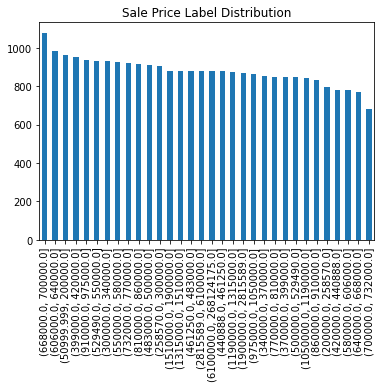

In [ ]:
nyc_housing['SALE PRICE'].value_counts().plot(kind='bar', title="Sale Price Label Distribution")
#sns.histplot( nyc_housing['SALE PRICE'],binwidth=3, height=3)

Here we will change the all values to non-numeric values using an encoder.

In [ ]:
nyc_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28097 entries, 31184 to 9594
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         28097 non-null  category      
 1   NEIGHBORHOOD                    28097 non-null  category      
 2   BUILDING CLASS CATEGORY         28097 non-null  category      
 3   TAX CLASS AT PRESENT            28097 non-null  category      
 4   BLOCK                           28097 non-null  category      
 5   LOT                             28097 non-null  category      
 6   BUILDING CLASS AT PRESENT       28097 non-null  category      
 7   ADDRESS                         28097 non-null  category      
 8   APARTMENT NUMBER                28097 non-null  category      
 9   ZIP CODE                        28097 non-null  category      
 10  RESIDENTIAL UNITS               28097 non-null  int64         
 11 

One-hot = [0-9, 16-17]

ordinal-enc = [18-19]

We need to change categorical values to numerical values to train our model.Extracting the features here for the 2 types of encoders: one hot encoder, and ordinal encoder. The ordinal encoder preserve ordering within an encoded feature. The one hot encoder is simply used to transform categorical value to numeric ones.

In [ ]:
featuresHot = [
  'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
  'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
  'ADDRESS','APARTMENT NUMBER', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE',
  'BUILDING CLASS AT TIME OF SALE', 'AGE CATEGORY'
]

featuresOrdinal = ['SALE DATE']

featuresLabel = ['SALE PRICE']

All features are not categorical in distribution.
Hence, we cannot use the categorical naive bayes alorgithm. We can not use naive bayes algorithm for this because the features currently in the dataframe because naive bayes makes the assumption that features are independent of each other. This is not the case for our dataset.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

encLab = LabelEncoder()

Y_Label_enc = encLab.fit_transform(nyc_housing[featuresLabel]) # f

nyc_housing_enc = nyc_housing

nyc_housing_enc['SALE PRICE'] = Y_Label_enc


/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
encOrd = OrdinalEncoder()
X_oneOrd = encOrd.fit_transform(nyc_housing_enc[featuresOrdinal])

nyc_housing_enc[featuresOrdinal] = X_oneOrd

nyc_housing_enc[featuresOrdinal]
 

,SALE DATE
31184,260.0
25041,28.0
32529,77.0
31968,31.0
13380,83.0
...,...
4781,195.0
2067,99.0
2090,25.0
66508,101.0


In [ ]:
categorical_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
  'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
  'ADDRESS','APARTMENT NUMBER', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE',
  'BUILDING CLASS AT TIME OF SALE', 'AGE CATEGORY'
]

for column in categorical_columns:
    tempdf = pd.get_dummies(nyc_housing_enc[column], prefix=column)
    nyc_housing_enc = pd.merge(
        left=nyc_housing_enc,
        right=tempdf,
        left_index=True,
        right_index=True,
    )
    nyc_housing_enc = nyc_housing_enc.drop(columns=column)



In [ ]:
nyc_housing_enc.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,AGE,BOROUGH_1,...,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y1,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z2,BUILDING CLASS AT TIME OF SALE_Z3,BUILDING CLASS AT TIME OF SALE_Z7,BUILDING CLASS AT TIME OF SALE_Z9,AGE CATEGORY_Post War,AGE CATEGORY_Pre War
31184,2,0,2,2333.0,2128.0,1930,0,260.0,91,0,...,0,0,0,0,0,0,0,0,0,1
25041,2,0,2,2860.0,2020.0,1925,0,28.0,96,0,...,0,0,0,0,0,0,0,0,0,1
32529,2,0,2,5625.0,1968.0,1910,0,77.0,111,0,...,0,0,0,0,0,0,0,0,0,1
31968,28,0,28,4532.0,16000.0,1931,0,31.0,90,0,...,0,0,0,0,0,0,0,0,0,1
13380,4,2,6,1443.0,5472.0,1910,0,83.0,111,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split

featureList = nyc_housing_enc.columns.tolist()
featureList.remove('SALE PRICE')

X_train, X_test, y_train, y_test = train_test_split(nyc_housing_enc[featureList] , nyc_housing_enc['SALE PRICE'], test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

y = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y)
print('Accuracy of Decision Tree:', acc)

Accuracy of Decision Tree: 0.1318882777957511


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
confMat = confusion_matrix(y_test, y)
confMat

array([[ 44,  20,  21, ...,   2,   4,   2],
       [ 20,  14,  22, ...,   1,   1,   0],
       [ 19,  13,  25, ...,   2,   1,   0],
       ...,
       [  4,   1,   4, ...,  78,  46,   7],
       [  4,   2,   3, ...,  51, 101,  65],
       [  1,   1,   0, ...,   8,  32, 211]])

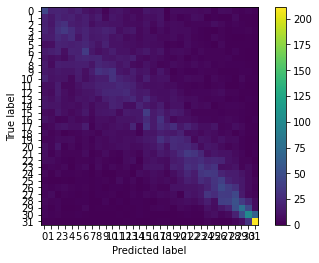

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y, include_values=False)

In [ ]:
nyc_housing

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE CATEGORY
31184,3,BROWNSVILLE,02 TWO FAMILY DWELLINGS,1,3624,13,B1,587 BRISTOL STREET,,11212,...,2,2333.0,2128.0,1930,1,B1,0,260.0,91,Pre War
25041,2,WILLIAMSBRIDGE,02 TWO FAMILY DWELLINGS,1,4849,72,B2,866 E 225TH ST,,10466,...,2,2860.0,2020.0,1925,1,B2,0,28.0,96,Pre War
32529,3,CANARSIE,02 TWO FAMILY DWELLINGS,1,8179,75,B3,32 CONKLIN AVENUE,,11236,...,2,5625.0,1968.0,1910,1,B3,0,77.0,111,Pre War
31968,3,BUSHWICK,09 COOPS - WALKUP APARTMENTS,2,3139,12,C6,890 FLUSHING AVENUE,,11206,...,28,4532.0,16000.0,1931,2,C6,0,31.0,90,Pre War
13380,1,UPPER EAST SIDE (59-79),22 STORE BUILDINGS,4,1412,53,K4,1115 LEXINGTON AVENUE,,10075,...,6,1443.0,5472.0,1910,4,K4,0,83.0,111,Pre War
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781,1,GREENWICH VILLAGE-WEST,21 OFFICE BUILDINGS,4,603,28,O3,95 MORTON STREET,,10014,...,11,20019.0,154328.0,1911,4,O3,31,195.0,110,Pre War
2067,1,FASHION,25 LUXURY HOTELS,4,806,76,H1,371 7 AVENUE,,10001,...,538,19011.0,473391.0,1929,4,H1,31,99.0,92,Pre War
2090,1,FINANCIAL,08 RENTALS - ELEVATOR APARTMENTS,2,27,9,D5,63 WALL STREET,,10005,...,482,17623.0,400531.0,1929,2,D5,31,25.0,92,Pre War
66508,4,LONG ISLAND CITY,27 FACTORIES,4,281,1,F9,31-00 47TH AVENUE,,11101,...,51,120000.0,568000.0,1922,4,F9,31,101.0,99,Pre War


In [ ]:
featuresHot = [
  'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 
  'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'BUILDING CLASS AT PRESENT',
  'ADDRESS','APARTMENT NUMBER', 'ZIP CODE', 'TAX CLASS AT TIME OF SALE',
  'BUILDING CLASS AT TIME OF SALE', 'AGE CATEGORY','SALE DATE'
]

featuresLabel = ['SALE PRICE']

In [ ]:
encLab = LabelEncoder()

Y_Label_enc = encLab.fit_transform(nyc_housing[featuresLabel])

nyc_housing_enc2 = nyc_housing

nyc_housing_enc2['SALE PRICE'] = Y_Label_enc

/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
encOrd = OrdinalEncoder()
for feature in featuresHot:
    tmpVal = nyc_housing_enc2[feature]
    X_oneOrd = tmpVal.to_numpy()
    nyc_housing_enc2[feature] = encOrd.fit_transform(X_oneOrd.reshape((-1,1)))


nyc_housing_enc2

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,AGE,AGE CATEGORY
31184,2.0,29.0,1.0,0.0,2916.0,12.0,9.0,21132.0,0.0,100.0,...,2,2333.0,2128.0,1930,0.0,9.0,0,260.0,91,1.0
25041,1.0,237.0,1.0,0.0,3985.0,71.0,10.0,25450.0,0.0,69.0,...,2,2860.0,2020.0,1925,0.0,10.0,0,28.0,96,1.0
32529,2.0,34.0,1.0,0.0,6619.0,74.0,11.0,15542.0,0.0,123.0,...,2,5625.0,1968.0,1910,0.0,11.0,0,77.0,111,1.0
31968,2.0,32.0,7.0,1.0,2486.0,11.0,19.0,25979.0,0.0,94.0,...,28,4532.0,16000.0,1931,1.0,19.0,0,31.0,90,1.0
13380,0.0,224.0,13.0,5.0,1145.0,52.0,73.0,1914.0,0.0,40.0,...,6,1443.0,5472.0,1910,2.0,75.0,0,83.0,111,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4781,0.0,104.0,12.0,5.0,459.0,27.0,92.0,26881.0,0.0,13.0,...,11,20019.0,154328.0,1911,2.0,94.0,31,195.0,110,1.0
2067,0.0,75.0,15.0,5.0,635.0,75.0,49.0,17104.0,0.0,1.0,...,538,19011.0,473391.0,1929,2.0,50.0,31,99.0,92,1.0
2090,0.0,77.0,6.0,1.0,12.0,8.0,27.0,21876.0,0.0,5.0,...,482,17623.0,400531.0,1929,1.0,27.0,31,25.0,92,1.0
66508,3.0,135.0,17.0,5.0,216.0,0.0,39.0,15235.0,0.0,84.0,...,51,120000.0,568000.0,1922,2.0,39.0,31,101.0,99,1.0


In [ ]:
from sklearn.model_selection import train_test_split

featureList = nyc_housing_enc2.columns.tolist()
featureList.remove('SALE PRICE')

X_train, X_test, y_train, y_test = train_test_split(nyc_housing_enc2[featureList] , nyc_housing_enc2['SALE PRICE'], test_size=0.33, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

clf.fit(X_train, y_train)

y = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y)
print('Accuracy of Decision Tree:', acc)

Accuracy of Decision Tree: 0.1387900355871886


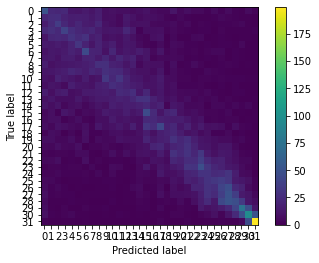

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y, include_values=False)